<a href="https://colab.research.google.com/github/mahayel374-pixel/pesticide_sprinking_system_project-/blob/main/First_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**USE THIS IMAGE FOR TESTING**
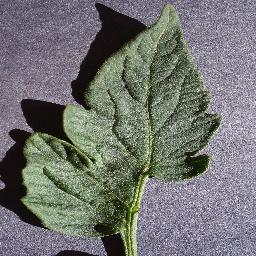

IF YOU WANT TO UPLOAD THE IMAGE USE THE GIVEN CODE BELOW


In [14]:
from google.colab import files

print("📂 Upload your leaf images (you can select multiple files)...")
uploaded = files.upload()


📂 Upload your leaf images (you can select multiple files)...


KeyboardInterrupt: 

**Detection of Disease**

In [13]:

import cv2
from PIL import Image
from IPython.display import display

img_path = "0d615a38-cfa4-45e4-b1b4-9977220e19ca___RS_HL 9815.jpg"  # replace with uploaded filename
img = cv2.imread(img_path)

if img is None:
    print("❌ Failed to load image. Check the file path!")
else:
    print("✅ Image loaded")
    display(Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)))


❌ Failed to load image. Check the file path!


In [12]:
for img_name in uploaded.keys():
    print(f"\n--- Processing: {img_name} ---")
    detect_on_image(img_name, conf_thresh=0.1)  # low threshold to see weak predictions


NameError: name 'uploaded' is not defined

# -------------------------
# Loop: capture + detect
# -------------------------
import time
import cv2
from IPython.display import display, clear_output, Javascript
from PIL import Image
import numpy as np
from base64 import b64decode
from google.colab.output import eval_js

# -------------------------
# Colab webcam setup
# -------------------------
def take_photo():
    js = Javascript('''
        async function takePhoto() {
          const div = document.createElement('div');
          const capture = document.createElement('button');
          capture.textContent = 'Capture';
          div.appendChild(capture);
          document.body.appendChild(div);

          const video = document.createElement('video');
          video.style.display = 'block';
          const stream = await navigator.mediaDevices.getUserMedia({video: true});
          video.srcObject = stream;
          video.play();
          div.appendChild(video);

          await new Promise((resolve) => capture.onclick = resolve);
          const canvas = document.createElement('canvas');
          canvas.width = video.videoWidth;
          canvas.height = video.videoHeight;
          canvas.getContext('2d').drawImage(video, 0, 0);
          stream.getTracks().forEach(track => track.stop());
          div.remove();
          return canvas.toDataURL('image/jpeg', 0.8);
        }
    ''')
    display(js)
    data = eval_js('takePhoto()')
    binary = b64decode(data.split(',')[1])
    image = np.frombuffer(binary, dtype=np.uint8)
    img = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return img

# -------------------------
# Run YOLO detection on captured frame
# -------------------------
def detect_and_display(frame):
    results = model(frame)
    annotated_frame = results[0].plot()

    # Convert BGR to RGB
    img_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)
    im_pil = Image.fromarray(img_rgb)

    clear_output(wait=True)
    display(im_pil)

    for r in results[0].boxes:
        cls_id = int(r.cls[0])
        disease_name = model.names[cls_id]
        description = disease_info.get(disease_name, "No description available.")
        if disease_name == "Tomato___healthy":
            print(f"🌱 {disease_name}\n{description}\n")
        else:
            print(f"⚠ {disease_name}\n{description}\n")

try:
    while True:
        print("📸 Capturing frame from webcam...")
        frame = take_photo()
        detect_and_display(frame)
        time.sleep(1)  # wait 1 second before next capture

except KeyboardInterrupt:
    print("🛑 Detection stopped by user")

In [11]:
%pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.3 MB/s eta 0:00:00


In [10]:
# -------------------------
# Imports
# -------------------------
from ultralytics import YOLO
import cv2
from IPython.display import display, clear_output, Javascript
from PIL import Image
import numpy as np
from base64 import b64decode
from google.colab.output import eval_js

# -------------------------
# Disease info dictionary
# -------------------------
disease_info = {
    "Tomato___Bacterial_spot": "Bacterial disease causing dark, water-soaked spots on leaves and fruit.\n💡 Remedy: Use copper-based fungicides, avoid overhead watering, and remove infected leaves.",
    "Tomato___Early_blight": "Fungal disease with brown concentric rings on older leaves, often starting near the base of the plant.\n💡 Remedy: Apply fungicides, rotate crops, and remove infected debris.",
    "Tomato___Late_blight": "Aggressive fungal disease causing dark, water-soaked lesions on leaves, stems, and fruit.\n💡 Remedy: Use resistant varieties, apply fungicides, and destroy infected plants immediately.",
    "Tomato___Leaf_Mold": "Yellow spots on upper leaf surfaces and olive-green mold underneath.\n💡 Remedy: Improve air circulation, reduce humidity, apply fungicides like mancozeb.",
    "Tomato___Septoria_leaf_spot": "Small, circular dark spots with gray centers on older leaves.\n💡 Remedy: Remove infected leaves, use fungicides, and rotate crops.",
    "Tomato___Spider_mites Two-spotted_spider_mite": "Tiny pests causing stippling, yellowing, and webbing.\n💡 Remedy: Spray with miticides, neem oil, or insecticidal soap.",
    "Tomato___Target_Spot": "Dark circular spots with concentric rings on leaves and fruit.\n💡 Remedy: Apply fungicides, ensure spacing, and remove debris.",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus": "Viral disease spread by whiteflies. Symptoms: curling, yellowing, stunted growth.\n💡 Remedy: Control whiteflies, use resistant varieties, and remove infected plants.",
    "Tomato___Tomato_mosaic_virus": "Causes mottled leaves, stunted growth, reduced yield.\n💡 Remedy: Use resistant varieties, disinfect tools, avoid handling when wet.",
    "Tomato___healthy": "Leaf appears normal, green, and healthy.\n✅ Good practices: Balanced watering, spacing, regular monitoring."
}


ModuleNotFoundError: No module named 'ultralytics'

In [ ]:
# -------------------------
# Load YOLO model
# -------------------------
print("⏳ Loading YOLO model...")
model = YOLO("best.pt")   # ensure best.pt is in Colab runtime
print("✅ YOLO model loaded successfully!")


⏳ Loading YOLO model...
✅ YOLO model loaded successfully!


In [9]:
# -------------------------
# Colab webcam setup
# -------------------------
def take_photo():
    js = Javascript('''
        async function takePhoto() {
          const div = document.createElement('div');
          const capture = document.createElement('button');
          capture.textContent = '📸 Capture';
          div.appendChild(capture);
          document.body.appendChild(div);

          const video = document.createElement('video');
          video.style.display = 'block';
          const stream = await navigator.mediaDevices.getUserMedia({video: true});
          video.srcObject = stream;
          video.play();
          div.appendChild(video);

          await new Promise((resolve) => capture.onclick = resolve);
          const canvas = document.createElement('canvas');
          canvas.width = video.videoWidth;
          canvas.height = video.videoHeight;
          canvas.getContext('2d').drawImage(video, 0, 0);
          stream.getTracks().forEach(track => track.stop());
          div.remove();
          return canvas.toDataURL('image/jpeg', 0.8);
        }
    ''')
    display(js)
    photo_data = eval_js('takePhoto()')

    if photo_data is None:
        print("⚠️ No photo captured. Try again.")
        return None

    binary = b64decode(photo_data.split(',')[1])
    image = np.frombuffer(binary, dtype=np.uint8)
    img = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return img


In [7]:
# -------------------------
# Run YOLO detection on captured frame
# -------------------------
def detect_and_display(frame, conf_thresh=0.5):
    results = model(frame)   # YOLO inference
    annotated_frame = results[0].plot()  # bounding boxes

    # Convert BGR to RGB for display
    img_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)
    im_pil = Image.fromarray(img_rgb)

    clear_output(wait=True)   # refresh output each run
    display(im_pil)

    boxes = results[0].boxes

    # Debug: print all raw predictions
    print("Raw detections:")
    for r in boxes:
        cls_id = int(r.cls[0])
        conf = float(r.conf[0])
        print(f"Prediction → {model.names[cls_id]} with confidence {conf:.2f}")

    # -------------------------
    # Filter by confidence
    # -------------------------
    valid_boxes = [r for r in boxes if float(r.conf[0]) >= conf_thresh]

    # If nothing passes threshold, use top confidence prediction
    if len(valid_boxes) == 0 and len(boxes) > 0:
        top_r = max(boxes, key=lambda x: float(x.conf[0]))
        cls_id = int(top_r.cls[0])
        conf = float(top_r.conf[0])
        disease_name = model.names[cls_id]
        description = disease_info.get(disease_name, "No description available.")
        print(f"⚠️ {disease_name} (conf={conf:.2f})\n{description}\n")
        return

    # If no boxes at all → healthy
    if len(boxes) == 0:
        print("🌱 Tomato___healthy")
        print(disease_info["Tomato___healthy"])
        return

    # -------------------------
    # Show detected diseases
    # -------------------------
    for r in valid_boxes:
        cls_id = int(r.cls[0])
        conf = float(r.conf[0])
        disease_name = model.names[cls_id]
        description = disease_info.get(disease_name, "No description available.")

        if disease_name == "Tomato___healthy":
            print(f"🌱 {disease_name} (conf={conf:.2f})\n{description}\n")
        else:
            print(f"⚠️ {disease_name} (conf={conf:.2f})\n{description}\n")


In [2]:
# -------------------------
# Capture once and detect
# -------------------------
print("📸 Capturing frame from webcam...")
frame = take_photo()

if frame is not None:
    print("🔍 Running YOLO detection...")
    detect_and_display(frame)
else:
    print("⚠️ No frame captured. Please try again.")

📸 Capturing frame from webcam...


NameError: name 'take_photo' is not defined